# BW \#65 Microplastics
Earth Day, when many people take a few moments to think about the environment, was a little more than two weeks ago, on April 22nd. On that day, author Eve Schaub published an opinion piece in the Washington Post with the provocative title, "Don’t waste your time recycling plastic" (https://wapo.st/3UxdJQj). She is an avid fan of recycling... and yet, in this essay, she says that recycling plastic is actually quite bad for the environment.

I thought that it might be interesting (and yes, horrifying) to find out more about microplastics. I looked for data sets having to do with microplastics, and discovered that the National Oceanic and Atmospheric Administration (https://noaa.gov/), via its National Centers for Environmental Information (https://www.ncei.noaa.gov/) has an entire section related to marine microplastics -- that is, microplastics found in water — at https://www.ncei.noaa.gov/products/microplastics .

## Data and six questions
This week's data, as mentioned above, comes from the Marine Microplastics project at NOAA's National Centers for Environmental Information. https://experience.arcgis.com/experience/b296879cc1984fda833a8acc93e31476

Click on the "data table" button in the top left. Then click on the "actions" button (looks like four circles) in the top right corner. One available action will be "export," with a submenu. Choose "Export to CSV." That'll give you a file in CSV format.

## Challenges
The learning goals include grouping, pivot tables, plotting, working with dates, and working with text. 
- Read the CSV file into a data frame, ensuring that the "Date" column is treated as a "datetime" dtype.
- Create a line plot showing, in each year, how many measurements were performed. Now recreate the plot with a separate line for each ocean. What do you notice about the plot?


In [53]:
import pandas as pd

In [54]:
filename = "C:\\Users\\npigeon\\Git\\BW #65 Microplastics\\Marine_Microplastics_WGS84_5159774935198085819.csv"
df = pd.read_csv(filename,
                 parse_dates=['Date'])
df['Date']= df['Date'].dt.year


C:\Users\npigeon\AppData\Local\Temp\ipykernel_13264\355152252.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename,


In [55]:
df

,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,...,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,1,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,45.28000,-60.29000,1989,88ccb360-a4b6-4dac-954e-4eb7d61ecab4,-60.29000,45.28000
1,2,Atlantic Ocean,NaN,NaN,Neuston net,0.002276,pieces/m3,0.0005-0.005,Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.93000,-70.65000,1989,5a9c64f2-a6fb-40ed-a79a-f4bbb586d753,-70.65000,40.93000
2,3,Atlantic Ocean,NaN,NaN,Neuston net,0.004320,pieces/m3,0.0005-0.005,Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.93000,-70.65000,1989,a09a6842-c66a-4718-9989-4907cd428f38,-70.65000,40.93000
3,4,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.30000,-69.77000,1989,ce10e70e-5af9-4bb9-80ac-3467c3e90fba,-69.77000,40.30000
4,5,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,...,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,39.88000,-67.15000,1989,c2ccdc44-5c00-4e4d-bdcb-ae435dcefefd,-67.15000,39.88000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22261,22334,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,43.333333,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.48294,-8.94286,2019,8186aa9e-f061-4e60-bc93-35cecea71b50,-8.94286,38.48294
22262,22335,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,43.333333,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.46124,-8.99428,2019,0e2c5b28-b51b-4763-acec-c708af61683f,-8.99428,38.46124
22263,22336,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,76.666667,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.44652,-9.04146,2019,c4d70e52-ba68-42e3-93cf-160d0e516095,-9.04146,38.44652
22264,22337,Atlantic Ocean,NaN,NaN,Petite Ponar benthic grab,23.333333,pieces kg-1 d.w.,20-150,Medium,Rodrigues et al. 2022,...,"NOVA University Lisbon, Caparica, Portugal","Arrábida, Portugal",279326,https://www.ncei.noaa.gov/access/metadata/land...,38.43987,-9.09325,2019,5b5534c5-f6e5-43b2-b6fd-f1da28dc771e,-9.09325,38.43987


### Create a line plot showing, in each year, how many measurements were performed.

The data set contains measurements of microplastics taken all over the world, and in many different places. Each measurement indicates in which ocean it was taken, and in some places we see the region and subregion, as well

Do we see more measurements over time? Do we see them evenly spread out across different oceans?

<Axes: xlabel='Date'>

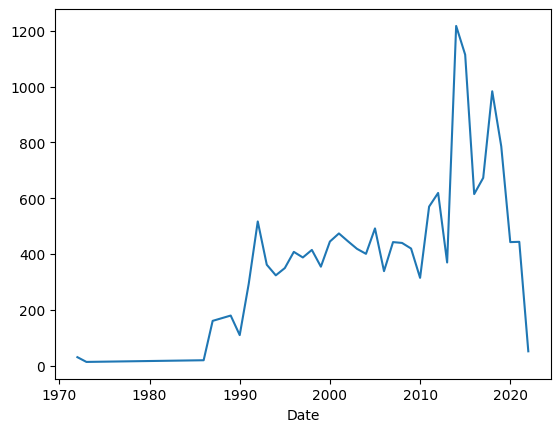

In [56]:
df.groupby(['Date'])['Measurement'].count().plot()

### Now recreate the plot with a separate line for each ocean. What do you notice about the plot?
Unstack, also known as pivot, Series with MultiIndex to produce DataFrame.

<Axes: xlabel='Date'>

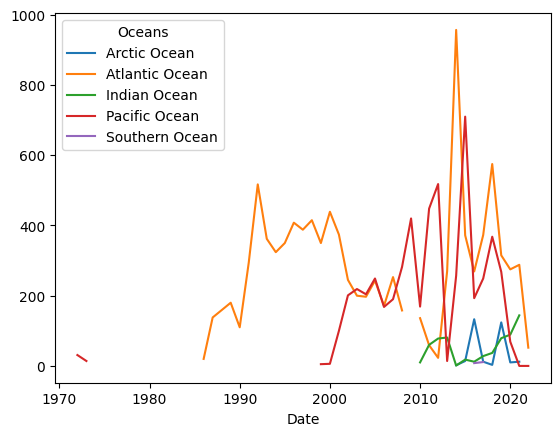

In [57]:
df.groupby(['Date', 'Oceans'])['Measurement'].count().unstack().plot()

**Correction**
When we try to pase the 'Date' column as a date we get a warning from the system. In other words: The datetime format in the “Date” column isn’t easily understandable by the parser — specifically, the “to_datetime” top-level function in Pandas.

To solve this problem, we need to tell Pandas how to parse a datetime in this format : MM/DD/YYYY HH:MM:SS AM/PM

A bit of examination shows that all of the values in the “Date” column have a time of 12:00:00 AM, aka midnight. So one way to handle this format would be to read the values as strings, remove the “12:00:00 AM” from each of them, and then pass the result to “pd.to_datetime”. 

Instead, I decided to pass the “date_format” keyword argument, whose value is a string in “strftime” format. The Python functions strftime (string-format-time) and strptime (string-parse-time) are used for output and input of dates, respectively. The format is taken literally except for characters following a %. You can learn more about these format codes from these two Web sites:



In [61]:
df = (
    pd
    .read_csv(filename, 
              parse_dates=['Date'], 
              date_format='%m/%d/%Y %I:%M:%S %p')
)

To create a line plot from such data, we’ll need a series in which the index contains years. The values should indicate how often each year was mentioned. This is most easily done with the “value_counts” method. But on what can I run “value_counts” to get the number of measurements per year? I can’t use the “Date” column, because that’ll count the number of measurements per date. But I can retrieve the year from the “Date” column using the “dt” accessor. By asking for “dt.year” on the “Date” column, we get a new series back containing the year from each row. 

We can then run “value_counts”, getting a series back in which the index contains years and the values are the counts of the times each year was mentioned.

Could we then run “plot.line”, and get a plot? Yes, but it won’t be in order, with earlier years on the left and later years on the right. That’s because “value_counts”, like many other grouping mechanisms in Pandas, sorts the results by default — in the case of “value_counts”, from most common to least common. Even if we were to turn off such sorting, we would still have to sort the rows from earliest year to latest one. We can do that with “sort_index”. The result is:

<Axes: xlabel='Date'>

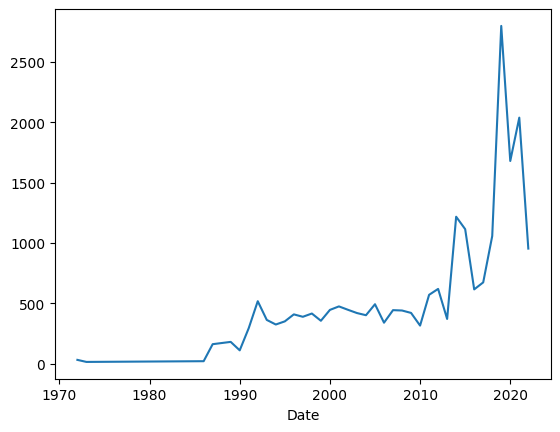

In [62]:
(
    df['Date']
    .dt.year
    .value_counts()
    .sort_index()
    .plot.line()
)

We can see that there were a small number of measurements for a long time, then more starting in the early 1990s, and then a huge spike in the early 2010s, followed by a drop. I would like to think that the drop happened around the time of covid-19, but it’s hard to know for sure.



That would require running “plot.line” not against a series, but rather against a data frame, one in which the index still contains years, but each column names a different ocean. The cells in that data frame indicate how many times each ocean was sampled each year.

To create such a data frame, I decided to use a two-dimensional “groupby”. Normally, we think of grouping as something we do on a single categorical column. However, I want to group primarily on the year, and then secondarily on the oceans. I can do that with this code

Instead of passing a single column name to “groupby”, we pass a list of columns for the grouping. And “Oceans” is passed as a string, but the first (year) values are passed by naming the column, then using the “dt.year” accessor.

Grouping on more than one column means that we’ll have a two-part multi-indexed series as a result.

The aggregation method I use is “count”, which (as you can imagine) returns the number of rows for this combination of year and ocean name.

Why did I decide to count “OBJECTID”? Not because I care about it very much, but because it has a value for every row. And I can’t use one of the columns on which I grouped.

Next, I take our two-part multi-index and move the inner part (“Oceans”) to be columns. It takes a bit of thought and imagination, but once you can picture this in your mind, it becomes much clearer: A two-column multi-indexed series is exactly the same as a data frame. We can use “unstack” to perform this switcheroo:


<Axes: xlabel='Date'>

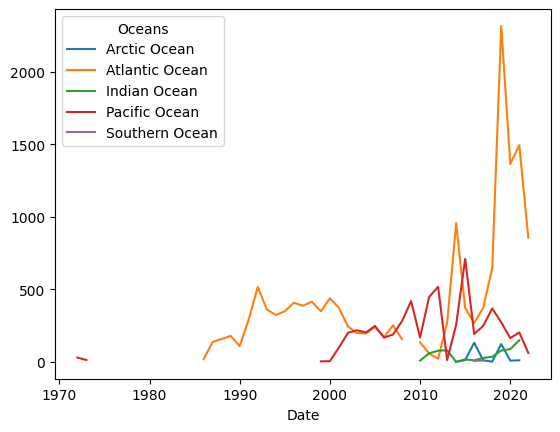

In [63]:
(
    df
    .groupby([df['Date'].dt.year, 'Oceans'])['OBJECTID'].count()
    .unstack(level='Oceans')
    .plot.line()
)

We can see that only a small number of samples have been done in the Arctic Ocean. That’s not hugely surprising, given how few people live near there.

We see, in the mid-2010s, a spike in sampling done in both the Atlantic and Pacific Oceans. But then we see an absolutely massive spike around 2020. Was this because of covid-19? Additional funding for environmental research? More environmental research outfits along the Atlantic Ocean? Or something else?

